In [ ]:
import seaborn as sns
# import matplotlib.pyplot as plt
# import os
from utils import load_and_preprocess_forex

sns.set_theme(style='whitegrid')
sns.set_palette('colorblind')

In [2]:
%matplotlib inline
from data_exploration import explore

## Read the dataset

In [ ]:
# temp = pd.read_csv('./data/titanic.csv')
timeframe = 60
data = load_and_preprocess_forex(f'data/GBPUSD/GBPUSD_{timeframe}.csv', timeframe)
data.info()

,time,open,high,low,close,volume
0,2007-08-11 03:00:00,2.02352,2.02430,2.02278,2.02278,3913
1,2007-08-13 04:00:00,2.02133,2.02210,2.02086,2.02170,6726
2,2007-08-13 05:00:00,2.02170,2.02335,2.02130,2.02260,7217
3,2007-08-13 06:00:00,2.02260,2.02260,2.02100,2.02110,8616
4,2007-08-13 07:00:00,2.02110,2.02350,2.02091,2.02340,11798


In [ ]:
data.head()

## Get dtypes for each columns

In [ ]:
str_var_list, num_var_list, all_var_list = explore.get_dtypes(data=data)

In [11]:
print(str_var_list) # string type
print(num_var_list) # numeric type
print(all_var_list) # all

['time', 'price_trend', 'volatility_level', 'volume_level', 'rsi_zone', 'trading_session', 'trend_position']
['close', 'volume', 'change', 'hour', 'day_of_week', 'month', 'is_weekend', 'sma_20', 'sma_50', 'rsi', 'high_low_pct', 'volatility', 'price_position', 'volume_ma', 'volume_ratio', 'change_1d', 'change_3d', 'change_7d', 'future_change', 'target']
['time', 'price_trend', 'volatility_level', 'volume_level', 'rsi_zone', 'trading_session', 'trend_position', 'close', 'volume', 'change', 'hour', 'day_of_week', 'month', 'is_weekend', 'sma_20', 'sma_50', 'rsi', 'high_low_pct', 'volatility', 'price_position', 'volume_ma', 'volume_ratio', 'change_1d', 'change_3d', 'change_7d', 'future_change', 'target']


## General data description

In [12]:
explore.describe(data=data,output_path=r'./output/')

,time,close,volume,change,hour,day_of_week,month,is_weekend,sma_20,sma_50,...,change_3d,change_7d,future_change,price_trend,volatility_level,volume_level,rsi_zone,trading_session,trend_position,target
count,101156,101156.000000,101156.000000,101156.000000,101156.000000,101156.000000,101156.000000,101156.000000,101156.000000,101156.000000,...,101156.000000,101156.000000,101156.000000,101156,101156,101156,101156,101156,101156,101156.0000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3,3,3,3,3,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Flat,Low,Low,Neutral,Asian,False,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,100286,101040,48363,73380,37931,100775,NaN
mean,2015-09-19 16:47:16.019612928,1.471531,9546.193375,-0.000401,11.498843,2.179446,6.561746,0.035954,1.471605,1.471723,...,-0.000397,-0.000401,-0.000406,NaN,NaN,NaN,NaN,NaN,NaN,0.4983
min,2007-08-15 04:00:00,1.040000,1.000000,-5.724838,0.000000,0.000000,1.000000,0.000000,1.066689,1.071433,...,-5.724838,-5.724838,-5.724838,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
25%,2011-08-29 21:45:00,1.301168,3201.000000,-0.050508,6.000000,1.000000,4.000000,0.000000,1.301144,1.301310,...,-0.050508,-0.050511,-0.050514,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
50%,2015-09-18 02:30:00,1.464650,5866.000000,0.000000,11.000000,2.000000,7.000000,0.000000,1.464594,1.464152,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
75%,2019-10-09 18:15:00,1.596810,10654.000000,0.050405,17.000000,3.000000,10.000000,0.000000,1.597011,1.597252,...,0.050402,0.050396,0.050392,NaN,NaN,NaN,NaN,NaN,NaN,1.0000
max,2023-10-27 19:00:00,2.112400,702044.000000,2.248788,23.000000,6.000000,12.000000,1.000000,2.110080,2.105595,...,2.248788,2.248788,2.248788,NaN,NaN,NaN,NaN,NaN,NaN,1.0000


## Discrete variable barplot
draw the barplot of a discrete variable x against y(target variable). 
By default the bar shows the mean value of y.

### 1. Time-based analysis

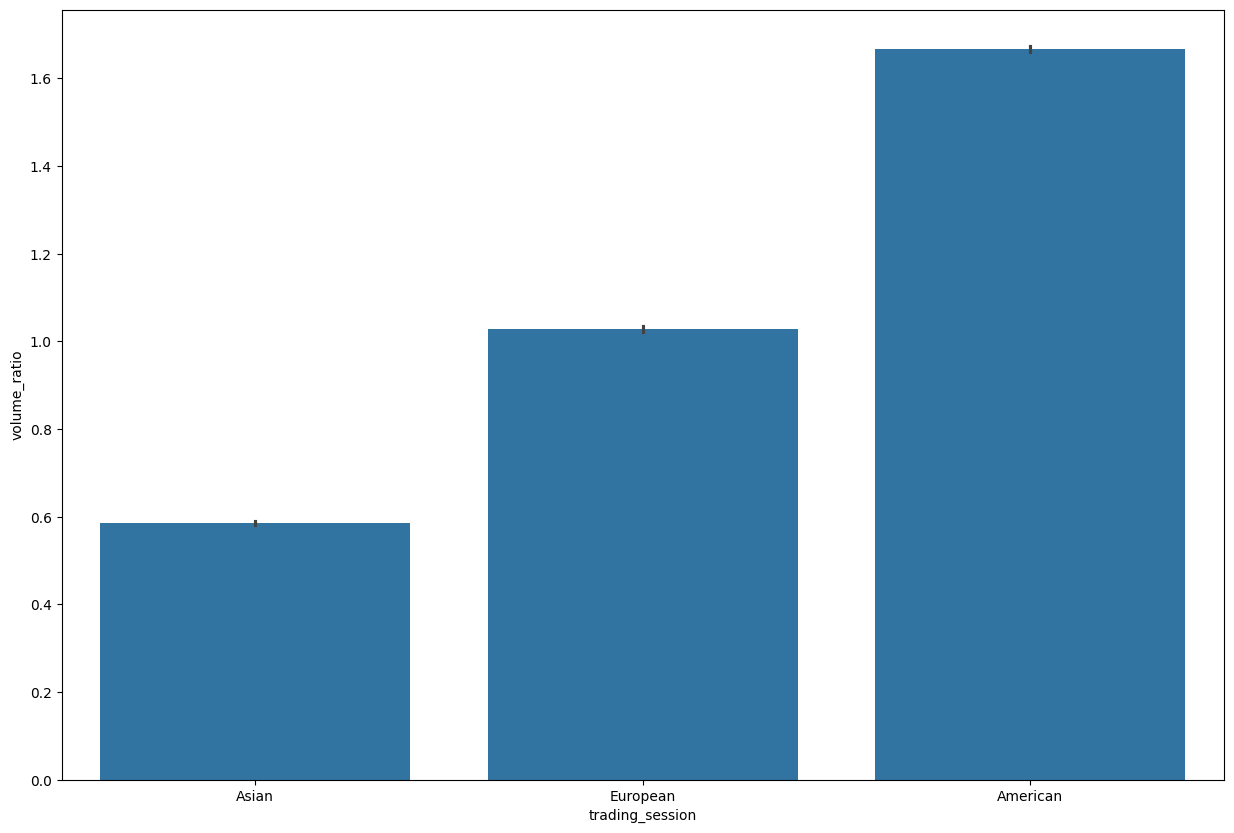

In [13]:
explore.discrete_var_barplot(x='trading_session', y='volume_ratio', data=data, output_path='./output/')

## Discrete variable countplot
draw the countplot of a discrete variable x

In [14]:
print(data.head())

                  time    close  volume    change  hour  day_of_week  month  \
49 2007-08-15 04:00:00  1.99650   11202 -0.010017     4            2      8   
50 2007-08-15 05:00:00  1.99680   10132  0.015026     5            2      8   
51 2007-08-15 06:00:00  1.99550   14322 -0.065104     6            2      8   
52 2007-08-15 07:00:00  1.99315   41373 -0.117765     7            2      8   
53 2007-08-15 08:00:00  1.99440   33169  0.062715     8            2      8   

    is_weekend    sma_20    sma_50  ...  change_3d  change_7d  future_change  \
49           0  2.002640  2.010936  ...  -0.017524  -0.059970       0.015026   
50           0  2.001905  2.010416  ...   0.047573   0.005001      -0.065104   
51           0  2.001105  2.009892  ...  -0.060063   0.015001      -0.117765   
52           0  2.000163  2.009303  ...  -0.010017  -0.144986       0.062715   
53           0  1.999322  2.008769  ...   0.015026  -0.017524      -0.075211   

    price_trend  volatility_level  volume_le

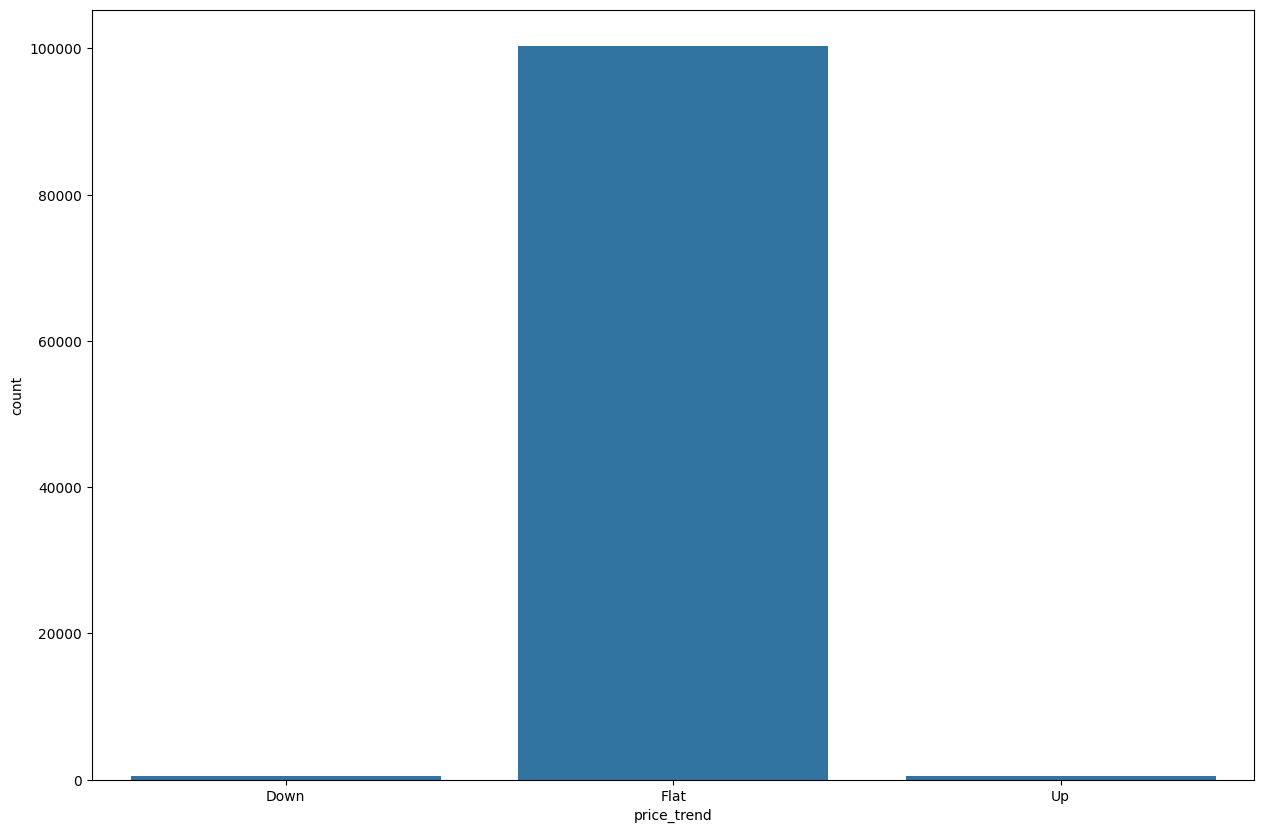

In [15]:
explore.discrete_var_countplot(x='price_trend', data=data, output_path='./output/')

## Discrete variable boxplot
draw the boxplot of a discrete variable x against y.

### 1. Time-based analysis

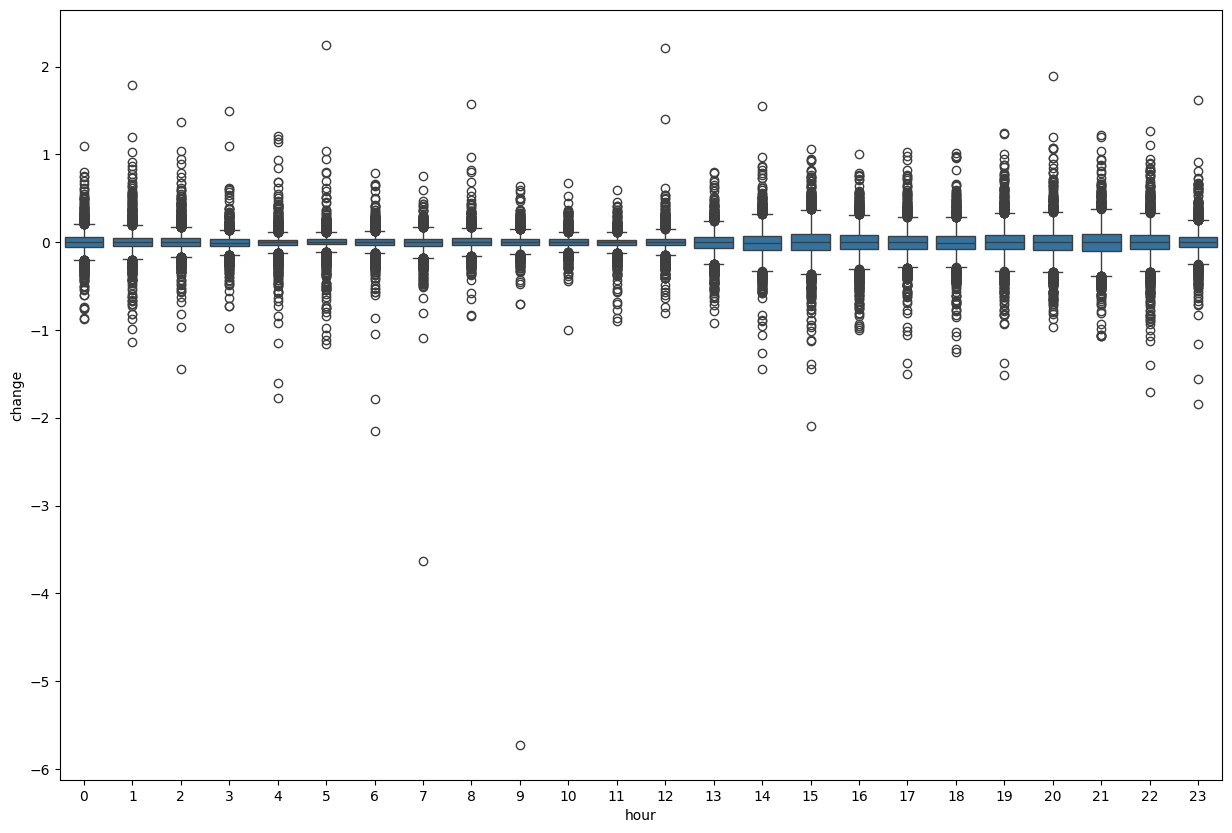

In [16]:
explore.discrete_var_boxplot(x='hour', y='change', data=data, output_path='./output/')

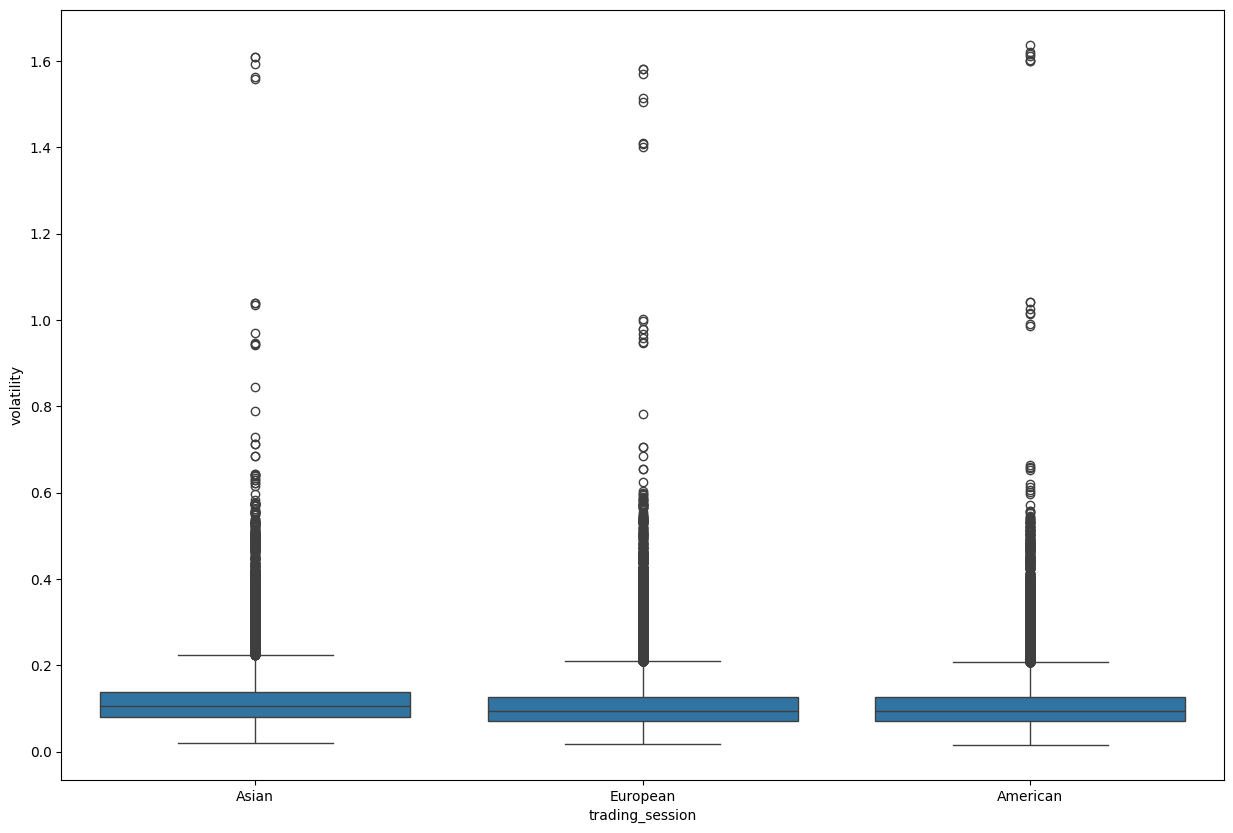

In [17]:
explore.discrete_var_boxplot(x='trading_session', y='volatility', data=data, output_path='./output/')

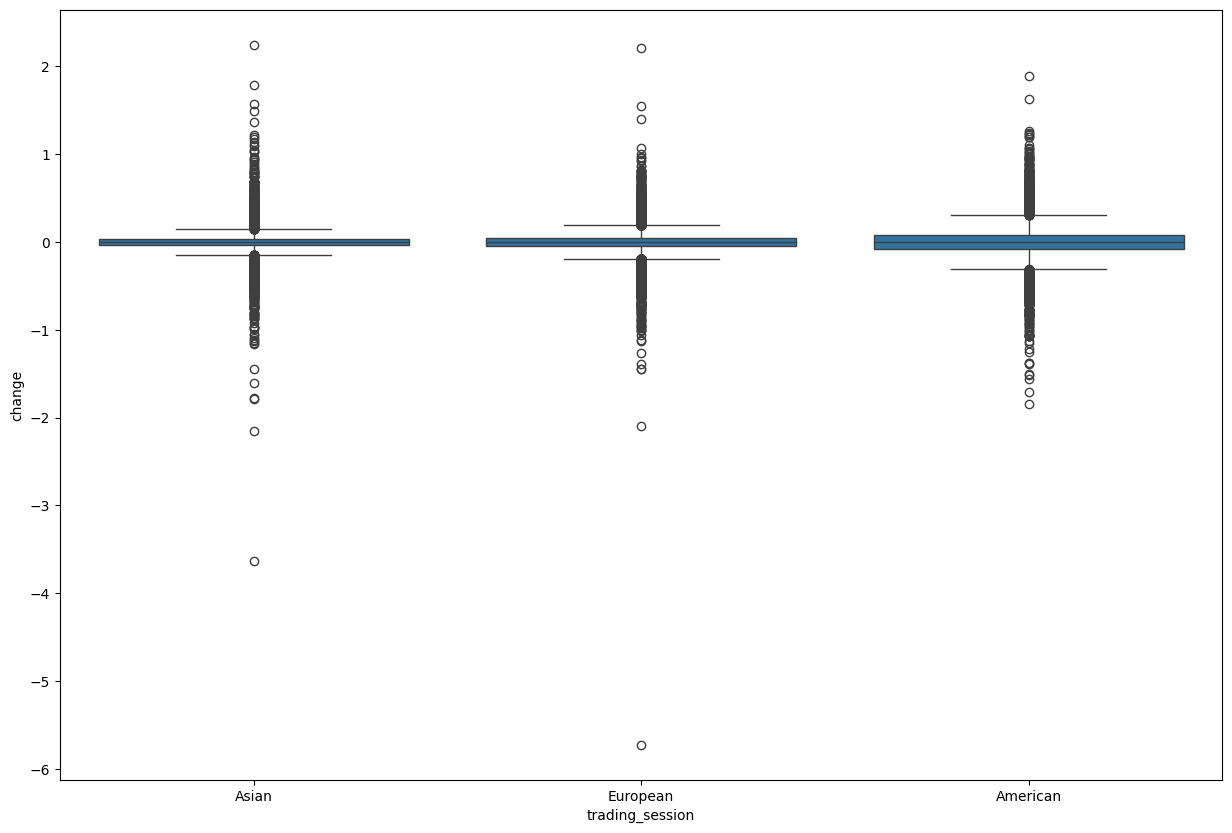

In [18]:
explore.discrete_var_boxplot(x='trading_session', y='change', data=data, output_path='./output/')

### 3. RSI and volatility zones

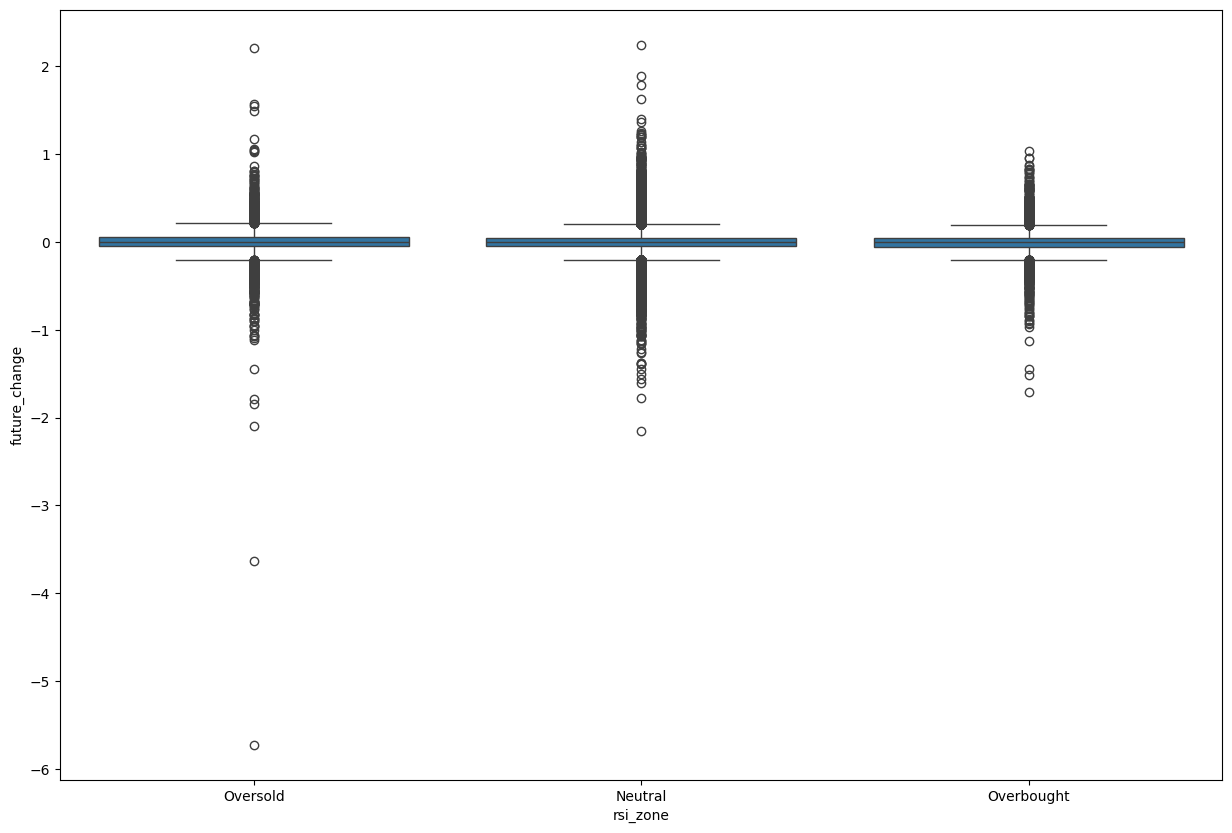

In [19]:
explore.discrete_var_boxplot(x='rsi_zone', y='future_change', data=data, output_path='./output/')

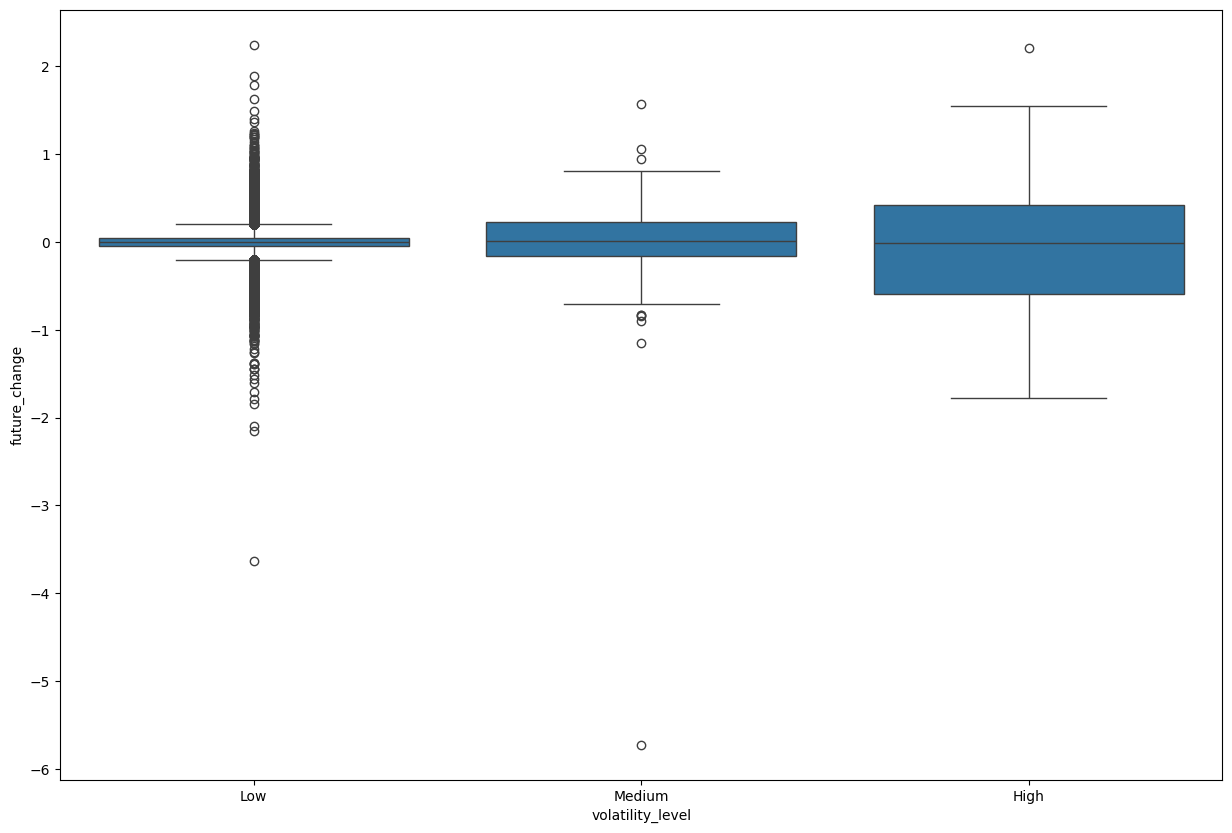

In [20]:
explore.discrete_var_boxplot(x='volatility_level', y='future_change', data=data, output_path='./output/')

### 4. Volume analysis

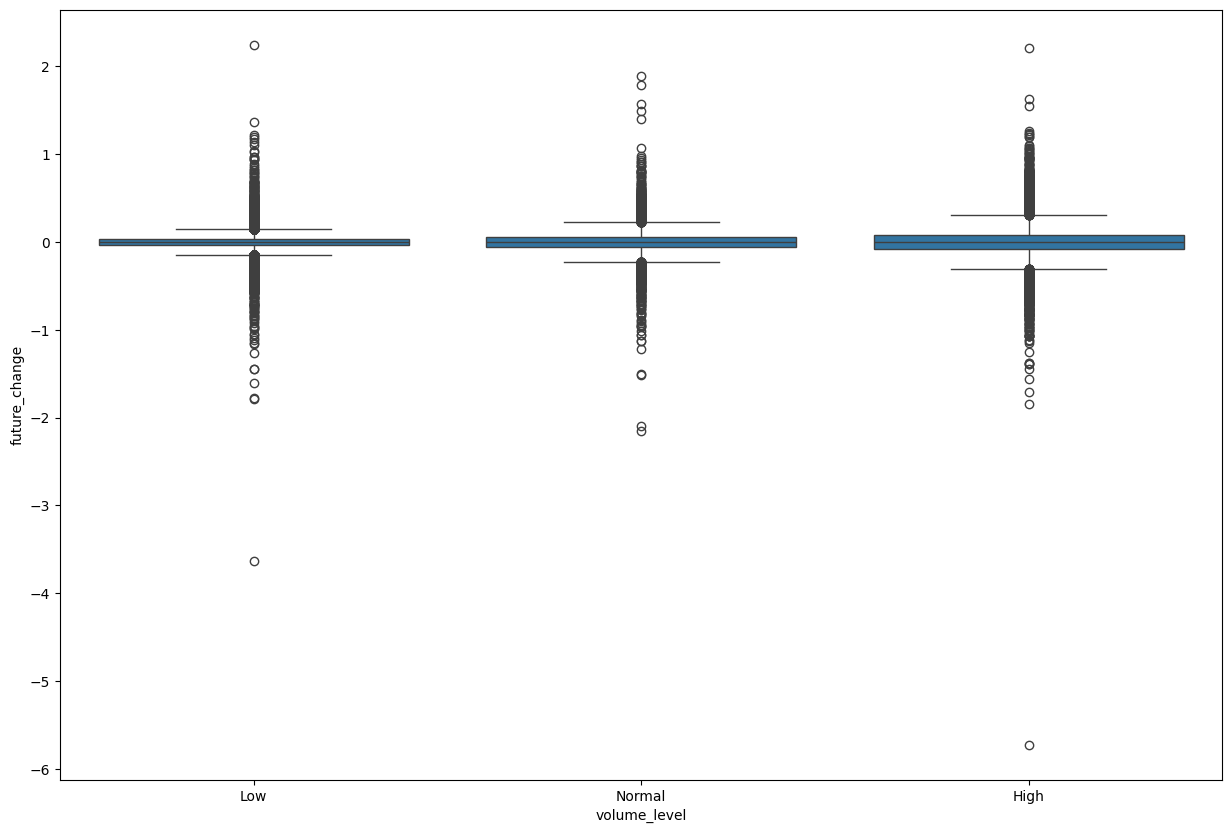

In [21]:
explore.discrete_var_boxplot(x='volume_level', y='future_change', data=data, output_path='./output/')

In [22]:
# Convert categories to codes for correlation
data['price_trend_code'] = data['price_trend'].cat.codes
data['session_code'] = data['trading_session'].cat.codes
data['vol_level_code'] = data['volatility_level'].cat.codes

### 5. Trend position analysis

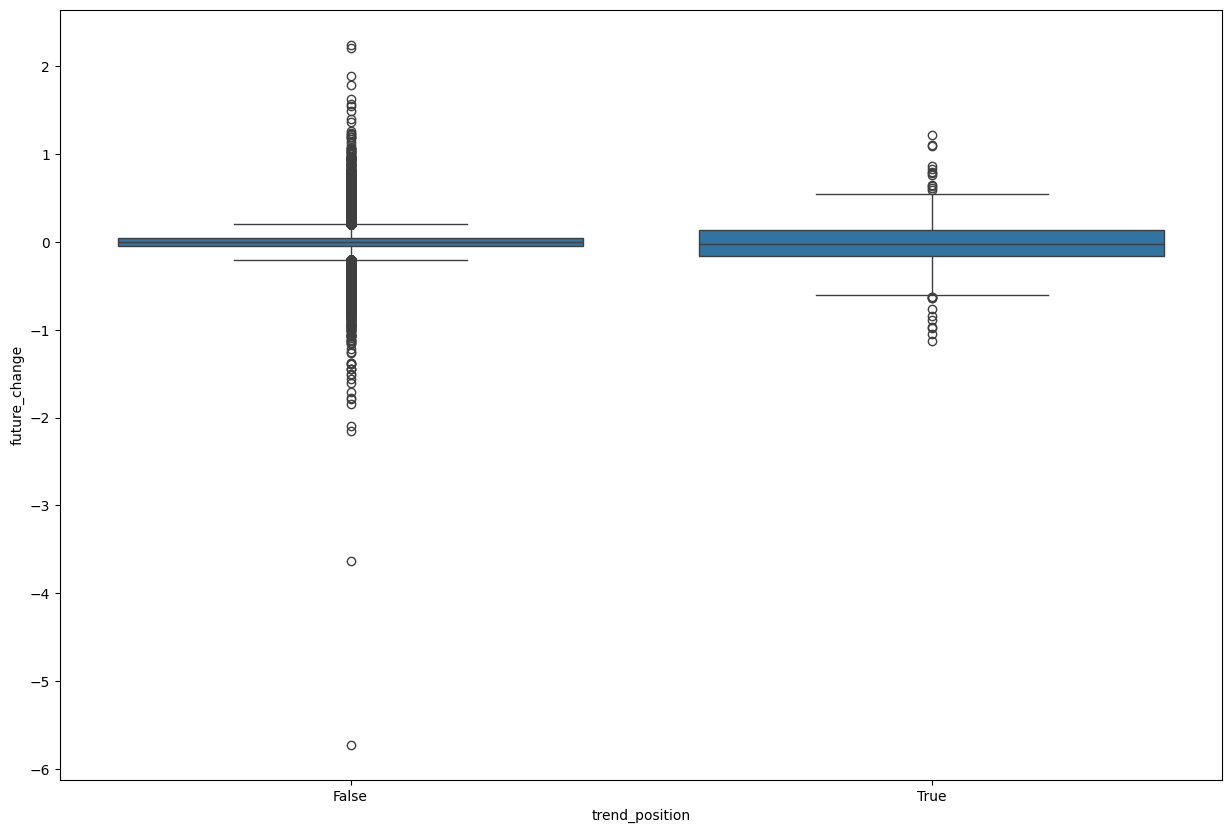

In [23]:
explore.discrete_var_boxplot(x='trend_position', y='future_change', data=data, output_path='./output/')

## Continuous variable distplot
draw the distplot of a continuous variable x.

### 6. Continuous distributions


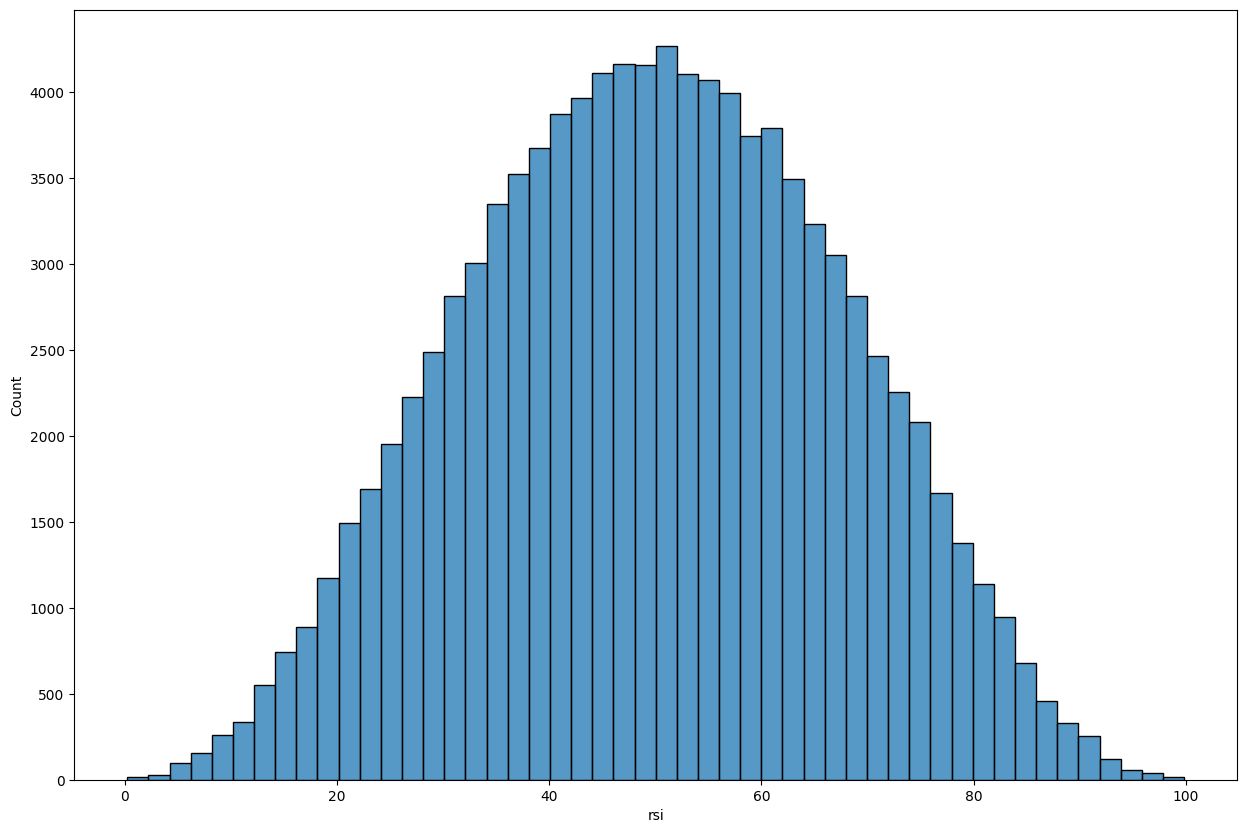

In [24]:
explore.continuous_var_distplot(x=data['rsi'], output_path='./output/', bins=50)

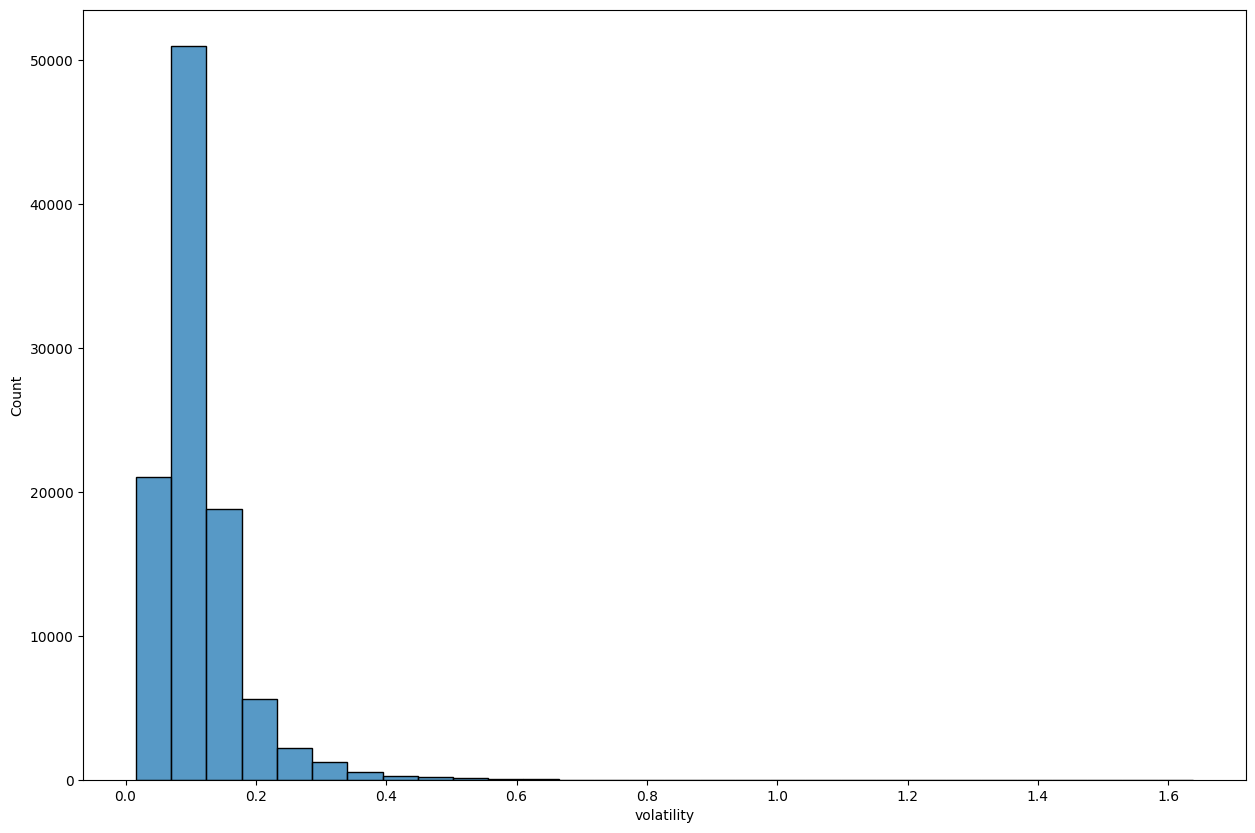

In [25]:
explore.continuous_var_distplot(x=data['volatility'], output_path='./output/', bins=30)

## Scatter plot
draw the scatter-plot of two variables.

### 2. Momentum analysis 

AttributeError: 'str' object has no attribute 'name'

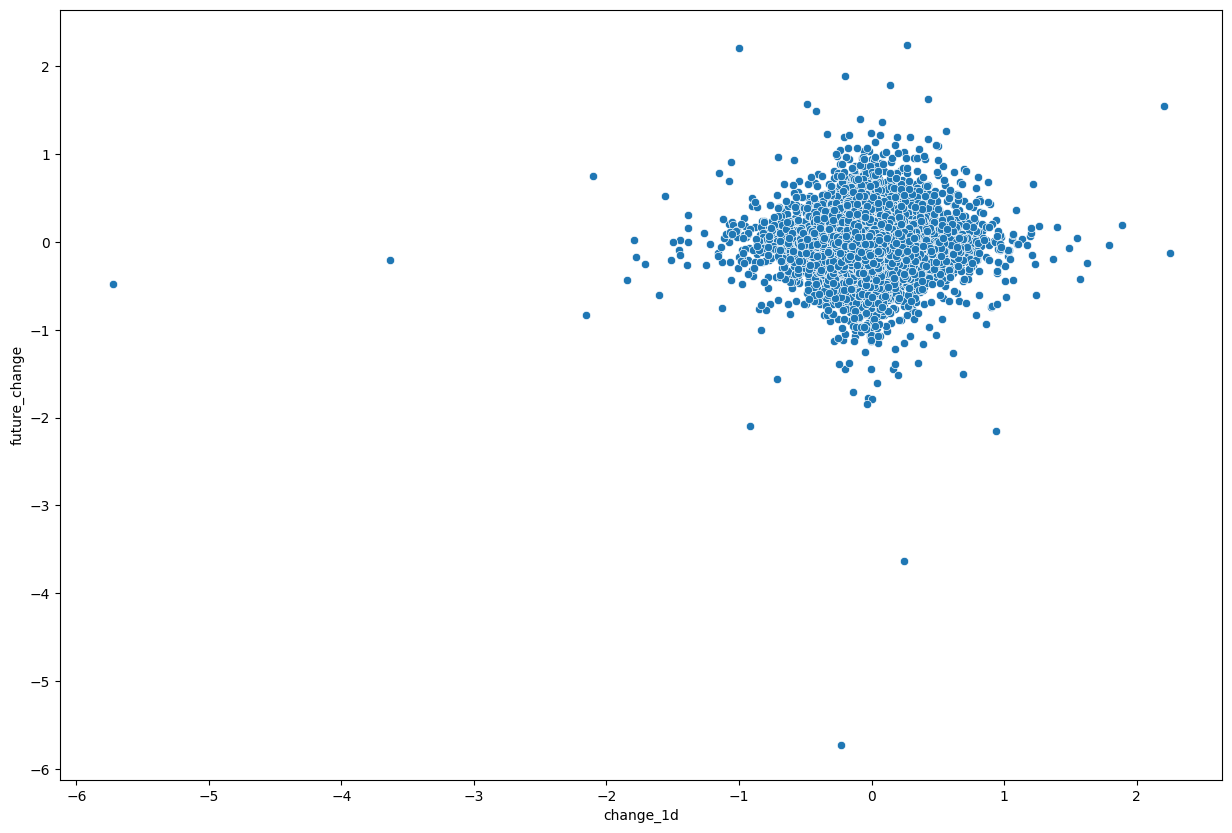

In [26]:
explore.scatter_plot(x='change_1d', y='future_change', data=data, output_path='./output/')

In [ ]:
explore.scatter_plot(x='rsi', y='future_change', data=data, output_path='./output/')

## Correlation plot
draw the correlation plot between variables.

### 9. Correlation analysis

In [ ]:
momentum_features = ['change', 'change_1d', 'change_3d', 'change_7d', 'future_change', 
                   'rsi', 'volatility', 'volume_ratio', 'price_position', 'target']
explore.correlation_plot(data=data[momentum_features], output_path='./output/')

## Heatmap

### 7. Multi-dimensional heatmaps

In [ ]:
session_trend_pivot = data.pivot_table(values='change', index='trading_session', 
                                     columns='price_trend', aggfunc='mean')
explore.heatmap(data=session_trend_pivot, output_path='./output/', fmt='.3f')

In [ ]:
rsi_vol_pivot = data.pivot_table(values='future_change', index='rsi_zone', 
                               columns='volatility_level', aggfunc='mean')
explore.heatmap(data=rsi_vol_pivot, output_path='./output/', fmt='.3f')

### 8. Target prediction probability by hour and day

In [ ]:
hourly_target_pivot = data.pivot_table(values='target', index='hour', columns='day_of_week', aggfunc='mean')
explore.heatmap(data=hourly_target_pivot, output_path='./output/', fmt='.3f')

In [ ]:
pivot_data = data.pivot_table(values='change', index='hour', columns='day_of_week', aggfunc='mean')
explore.heatmap(data=pivot_data, output_path='./output/', fmt='.2f')